In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [2]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [5]:
hDijet01Masses = r.TH1F("dijet01m","",600,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    dijet01 = jet0+jet1
    hDijet01Masses.Fill(dijet01.M())


Warning in <TFile::Append>: Replacing existing TH1: dijet01m (Potential memory leak).


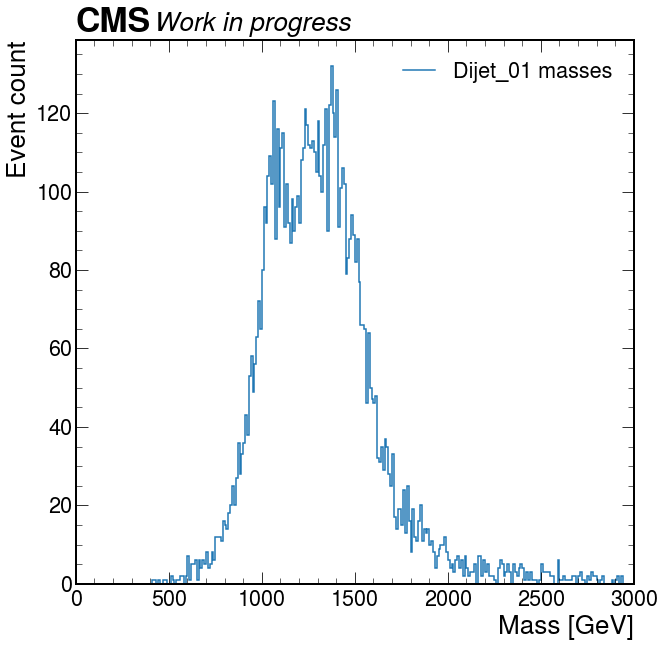

In [8]:
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array

plt.style.use([hep.style.CMS])
counts, edges = hist2array(hDijet01Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Dijet_01 masses")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()